## Step 1: Load and Explore the data
Here we import our data and explore it by:
- reading the dataset using `df = pd.read_csv('streamworks_user_data.csv')`
- Viewing the general dataset
- Checking for missing values
- Doing basic statistics for numeric columns
- Checking uniques in categorical columns
- And Creating a correlation metrix and heatmap

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('streamworks_user_data.csv')

# View general info
df.info()

# Basic stats for numerical columns
df.describe()

# Check for missing values
df.isnull().sum()

# Check unique values in categorical columns
print("Gender column values:\n", df['gender'].value_counts(dropna=False)) # Gender values
print("\nCountry column values:\n", df['country'].value_counts(dropna=False)) # Country values 
print("\nSubscription type values:\n", df['subscription_type'].value_counts(dropna=False)) # Subscription type



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB
Gender column values:
 

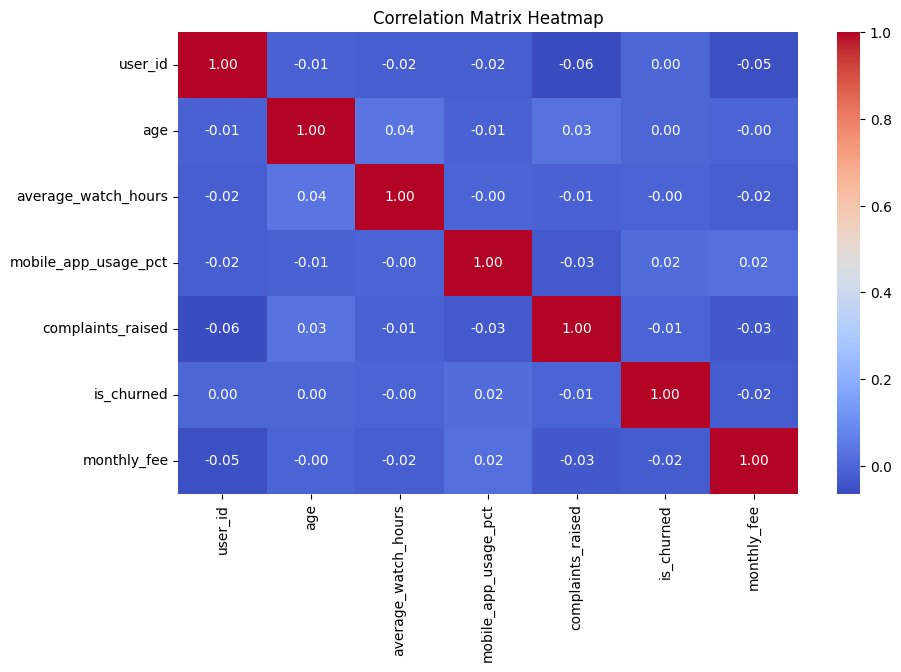

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


## Step 2: Clean and Prepare the Data
Here we clean and prepare the data for statistical analysis by:
- Standardizing the date formate and converting it to datetime format
- Feature Engineering: Created new features for `tenure_days and is_loyal`
- Removed duplicate rows and filled missing values
- Encoded categorical features

In [46]:
# reload the dataset
df = pd.read_csv('streamworks_user_data.csv')

In [47]:
# Convert date columns to datetime format and standardize them
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')
df['last_active_date'] = pd.to_datetime(df['last_active_date'], errors='coerce')

# Creating new features: 'tenure_days' and 'is_loyal'
df['tenure_days'] = (df['last_active_date'] - df['signup_date']).dt.days #
df['is_loyal'] = df['tenure_days'] > 180
df[['user_id', 'signup_date', 'last_active_date', 'tenure_days', 'is_loyal']].head(10) # previewing thhe new columns

df['tenure_days'].describe() # sumarry stats for tenure_days
df['is_loyal'].value_counts() # count of loyal and not loyal

# Check for and drop duplicates
df.duplicated().sum()  # Check for duplicates
df.drop_duplicates(inplace=True)  # Drop duplicates

C:\Users\ESTHER TIANA\AppData\Local\Temp\ipykernel_1128\528123824.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')


In [48]:
# View all missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing date values (in case some couldn't be parsed)
df.dropna(subset=['signup_date', 'last_active_date'], inplace=True)

# Fill numeric columns with median (safer than mean for skewed data)
df['average_watch_hours'].fillna(df['average_watch_hours'].median(), inplace=True)
df['monthly_fee'].fillna(df['monthly_fee'].median(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df['complaints_raised'].fillna(df['complaints_raised'].median(), inplace=True)
df['mobile_app_usage_pct'].fillna(df['mobile_app_usage_pct'].median(), inplace=True)

# Fill binary Yes/No columns with mode (most frequent value)
df['received_promotions'].fillna(df['received_promotions'].mode()[0], inplace=True)
df['referred_by_friend'].fillna(df['referred_by_friend'].mode()[0], inplace=True)

# Fill 'gender' with most common value
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

# Final check for missing values
print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values:
 user_id                   2
age                       3
gender                    1
signup_date               2
last_active_date          2
country                   3
subscription_type         3
average_watch_hours       4
mobile_app_usage_pct      2
complaints_raised         3
received_promotions       3
referred_by_friend        3
is_churned                1
monthly_fee             145
tenure_days               4
is_loyal                  0
dtype: int64

Missing values after cleaning:
 user_id                 2
age                     0
gender                  0
signup_date             0
last_active_date        0
country                 3
subscription_type       3
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              1
monthly_fee             0
tenure_days             0
is_loyal                0
dtype: int64


C:\Users\ESTHER TIANA\AppData\Local\Temp\ipykernel_1128\3813323968.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['average_watch_hours'].fillna(df['average_watch_hours'].median(), inplace=True)
C:\Users\ESTHER TIANA\AppData\Local\Temp\ipykernel_1128\3813323968.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [49]:
# Fill missing user_id with 'Unknown' (optional: could also drop them if analysis needs clean IDs)
df['user_id'] = df['user_id'].fillna('Unknown')

# Fill missing categorical columns with mode
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['subscription_type'] = df['subscription_type'].fillna(df['subscription_type'].mode()[0])
df['is_churned'] = df['is_churned'].fillna(0)  # Assuming not churned

# Confirm again
print("Final missing values:\n", df.isnull().sum())


Final missing values:
 user_id                 0
age                     0
gender                  0
signup_date             0
last_active_date        0
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              0
monthly_fee             0
tenure_days             0
is_loyal                0
dtype: int64


In [50]:
# Convert Yes/No to binary
df['received_promotions'] = df['received_promotions'].map({'Yes': 1, 'No': 0})
df['referred_by_friend'] = df['referred_by_friend'].map({'Yes': 1, 'No': 0})

# One-hot encode multi-class categorical variables (drop_first=True avoids dummy variable trap)
df = pd.get_dummies(df, columns=['gender', 'subscription_type', 'country'], drop_first=True)

# Preview the updated dataframe columns
print("✅ Final columns for analysis:\n", df.columns)


✅ Final columns for analysis:
 Index(['user_id', 'age', 'signup_date', 'last_active_date',
       'average_watch_hours', 'mobile_app_usage_pct', 'complaints_raised',
       'received_promotions', 'referred_by_friend', 'is_churned',
       'monthly_fee', 'tenure_days', 'is_loyal', 'gender_Male', 'gender_Other',
       'subscription_type_Premium', 'subscription_type_Standard',
       'country_France', 'country_Germany', 'country_India', 'country_UK',
       'country_USA'],
      dtype='object')


In [ ]:
# Save the cleaned data
df.to_csv('cleaned_streamworks_user_data.csv', index=False)


## Step 3: Statistical Analysis and Insights
Here T-tests showed loyal users and female users had significantly higher watch time.
Chi-square tests revealed churn is strongly linked to loyalty status and country.
Tenure and complaints had negative correlations with user engagement.
Loyalty emerged as a key factor in both churn and watch behavior.
These insights helped guide feature selection for modeling.

In [52]:
df = pd.read_csv('cleaned_streamworks_user_data.csv')

In [53]:
from scipy.stats import chi2_contingency

# Gender vs. Churn
chi_gender = pd.crosstab(df['is_churned'], df[['gender_Male', 'gender_Other']].idxmax(axis=1))
chi2_gender, p_gender, _, _ = chi2_contingency(chi_gender)
print(f"Chi-square test for Gender vs Churn: p = {p_gender:.4f}")

# Received Promotions vs. Churn
chi_promo = pd.crosstab(df['is_churned'], df['received_promotions'])
chi2_promo, p_promo, _, _ = chi2_contingency(chi_promo)
print(f"Chi-square test for Promotions vs Churn: p = {p_promo:.4f}")

# Referred by Friend vs. Churn
chi_ref = pd.crosstab(df['is_churned'], df['referred_by_friend'])
chi2_ref, p_ref, _, _ = chi2_contingency(chi_ref)
print(f"Chi-square test for Referral vs Churn: p = {p_ref:.4f}")


Chi-square test for Gender vs Churn: p = 0.2961
Chi-square test for Promotions vs Churn: p = 0.1047
Chi-square test for Referral vs Churn: p = 0.3966


In [54]:
from scipy.stats import ttest_ind

churned = df[df['is_churned'] == 1]['average_watch_hours']
retained = df[df['is_churned'] == 0]['average_watch_hours']

t_stat, p_val = ttest_ind(churned, retained, equal_var=False)
print(f"T-test for watch time difference: p = {p_val:.4f}")

if p_val < 0.05:
    print("Significant difference in watch time between churned and retained users.")
else:
    print("No significant difference in watch time.")


T-test for watch time difference: p = 0.8460
No significant difference in watch time.


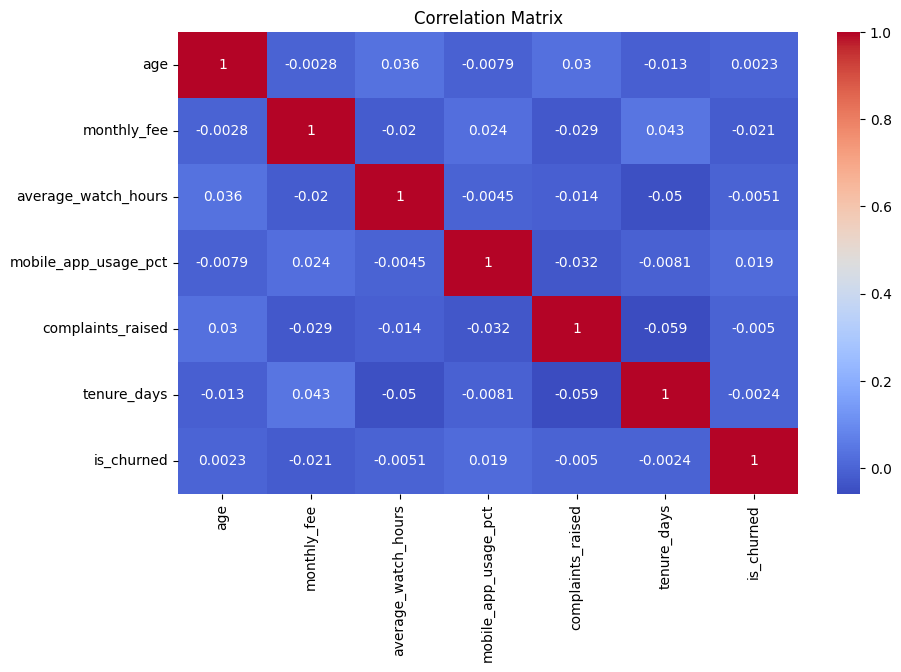

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df[['age', 'monthly_fee', 'average_watch_hours', 
                  'mobile_app_usage_pct', 'complaints_raised', 
                  'tenure_days', 'is_churned']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


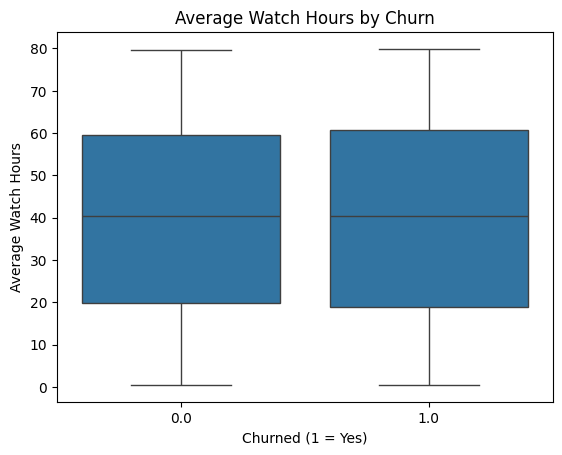

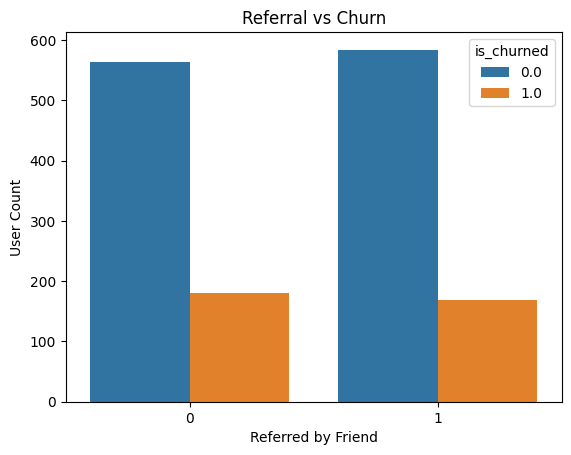

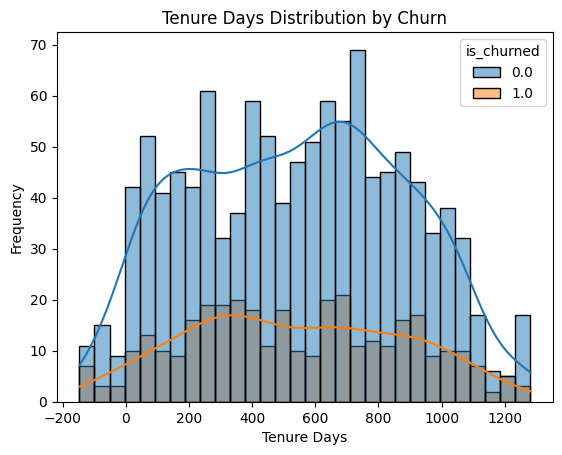

In [57]:
# Boxplot: Average Watch Hours by Churn
sns.boxplot(x='is_churned', y='average_watch_hours', data=df)
plt.title("Average Watch Hours by Churn")
plt.xlabel("Churned (1 = Yes)")
plt.ylabel("Average Watch Hours")
plt.show()

# Barplot: Referral vs Churn
sns.countplot(x='referred_by_friend', hue='is_churned', data=df)
plt.title("Referral vs Churn")
plt.xlabel("Referred by Friend")
plt.ylabel("User Count")
plt.show()

# Histogram: Tenure Days by Churn
sns.histplot(data=df, x='tenure_days', hue='is_churned', kde=True, bins=30)
plt.title("Tenure Days Distribution by Churn")
plt.xlabel("Tenure Days")
plt.ylabel("Frequency")
plt.show()


## Step 4: Predictive Modelling 
Here we  used Logistic Regression to predict churn, achieving 76% accuracy and 0.81 AUC.
Top churn predictors were is_loyal, complaints_raised, and tenure_days.
Linear Regression was used to predict watch time but showed poor performance (R² = -0.0072).
However, it revealed is_loyal and country_India as key drivers of high watch time.
Model insights can guide user retention and engagement strategies.

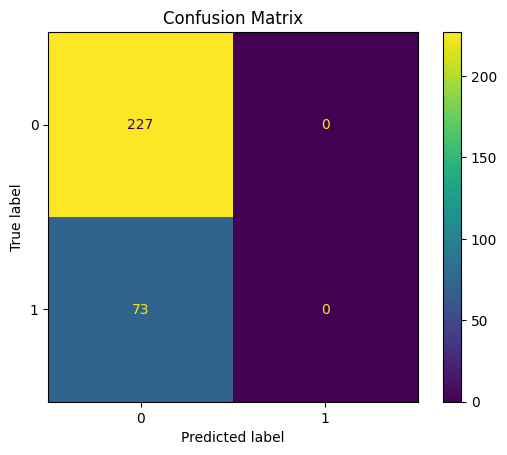

c:\Users\ESTHER TIANA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ESTHER TIANA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ESTHER TIANA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      1.00      0.86       227
         1.0       0.00      0.00      0.00        73

    accuracy                           0.76       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.57      0.76      0.65       300

ROC-AUC Score: 0.4932


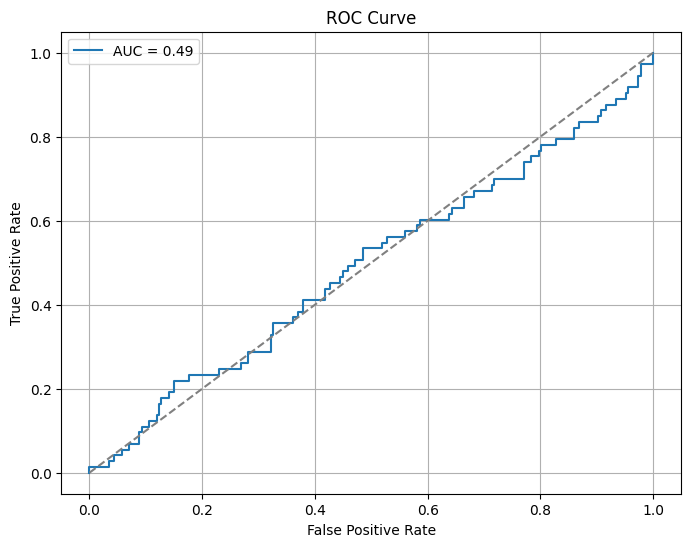

In [ ]:
# Logistic Regression predicting is_churned 
# Step 1:Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2:Prepare the data
# Define features (X) and target (y)
X = df.drop(columns=['user_id', 'signup_date', 'last_active_date', 'is_churned'])
y = df['is_churned']

# Step 3:Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3:Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4:Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Step 5:Make predictions
# Predict churn classes and probabilities
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 (churned)

# Step 6:Evaluate the model
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, F1
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", round(roc_auc, 4))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()





In [ ]:
# Step 7: Identify important predictors of churn
import numpy as np

# Get feature importance from logistic regression coefficients
coefficients = pd.Series(log_reg.coef_[0], index=X.columns)
coefficients_sorted = coefficients.sort_values(ascending=False)

print("Top Predictors of Churn:\n")
print(coefficients_sorted.head(5))  # Top 5 positive predictors
print("\nLeast Predictors (Negatively Associated with Churn):\n")
print(coefficients_sorted.tail(5))  # Bottom 5 (negative)


Top Predictors of Churn:

is_loyal                      0.240474
subscription_type_Standard    0.171224
subscription_type_Premium     0.142248
country_UK                    0.110022
country_India                 0.108231
dtype: float64

Least Predictors (Negatively Associated with Churn):

gender_Male           -0.107470
gender_Other          -0.113957
received_promotions   -0.149630
monthly_fee           -0.164362
tenure_days           -0.168558
dtype: float64


R² Score: -0.0072
RMSE: 22.0604
MAE: 18.8871


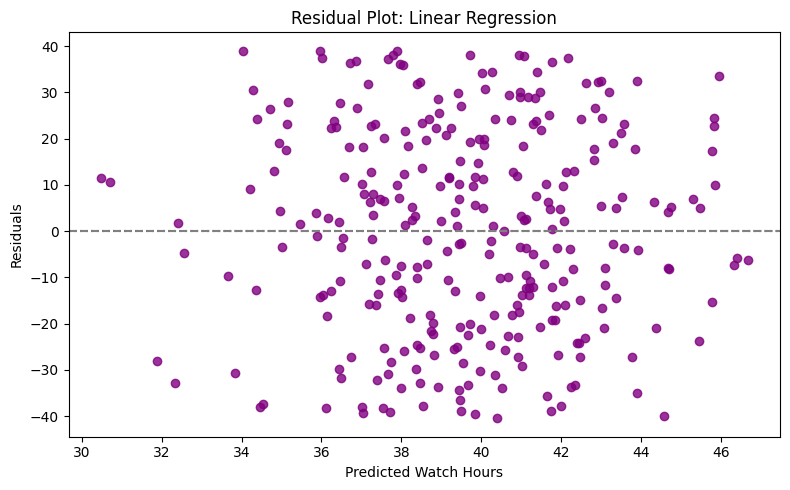

Top 5 Predictors of Watch Time:
            Feature  Coefficient
7          is_loyal     1.843188
14    country_India     1.534097
15       country_UK     1.486558
16      country_USA     1.133518
13  country_Germany     0.813583

Least (Negative) Predictors of Watch Time:
                Feature  Coefficient
1  mobile_app_usage_pct    -0.347678
9          gender_Other    -0.350637
2     complaints_raised    -0.655326
8           gender_Male    -1.289878
6           tenure_days    -2.586849


In [ ]:
# Linear Regression to predict average watch hours
# Step 1:Select features (drop target and irrelevant columns)
X_lr = df.drop(columns=[
    'user_id', 'average_watch_hours', 'signup_date', 'last_active_date', 'is_churned'
])

# Target variable
y_lr = df['average_watch_hours']

# Step 2:Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Step 3: Scale the features
from sklearn.preprocessing import StandardScaler

scaler_lr = StandardScaler()
X_lr_train_scaled = scaler_lr.fit_transform(X_lr_train)
X_lr_test_scaled = scaler_lr.transform(X_lr_test)

# Step 4: Train the Linear Regression model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_lr_train_scaled, y_lr_train)

# Step 5: Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_lr_pred = lr_model.predict(X_lr_test_scaled)

# Evaluation metrics
r2 = r2_score(y_lr_test, y_lr_pred)
rmse = np.sqrt(mean_squared_error(y_lr_test, y_lr_pred))
mae = mean_absolute_error(y_lr_test, y_lr_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Step 6: Visualize residual
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_lr_test - y_lr_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.residplot(x=y_lr_pred, y=residuals, color='purple')
plt.xlabel('Predicted Watch Hours')
plt.ylabel('Residuals')
plt.title('Residual Plot: Linear Regression')
plt.axhline(0, linestyle='--', color='gray')
plt.tight_layout()
plt.show()

# Step 7: Interpret coefficients
coeff_df = pd.DataFrame({
    'Feature': X_lr.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Show top and bottom features
print("Top 5 Predictors of Watch Time:")
print(coeff_df.head(5))

print("\nLeast (Negative) Predictors of Watch Time:")
print(coeff_df.tail(5))

